In [1]:
from HyperRD.Hrandom import *
from HyperRD.Halgorithm import *
from HyperRD.Hgraph import *
from HyperRD.Hdynamic import *
from HyperRD.Htranslate import *
import matplotlib.pyplot as plt

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


In [8]:
graph = simple_bipartite(10, 20, 20, 0.3)

In [9]:
len(graph.edges_dict)

9

In [10]:
graph.edges

{frozenset({1, 4, 5, 6, 8}),
 frozenset({7, 9}),
 frozenset({0, 1, 2, 4, 5, 6, 7, 9}),
 frozenset({7, 8}),
 frozenset({1, 3, 4, 6, 9}),
 frozenset({1, 3, 4, 6, 7, 8, 9}),
 frozenset({0, 1, 2, 5, 7, 9}),
 frozenset({1, 2, 3, 4, 6}),
 frozenset({3, 4, 5, 7})}

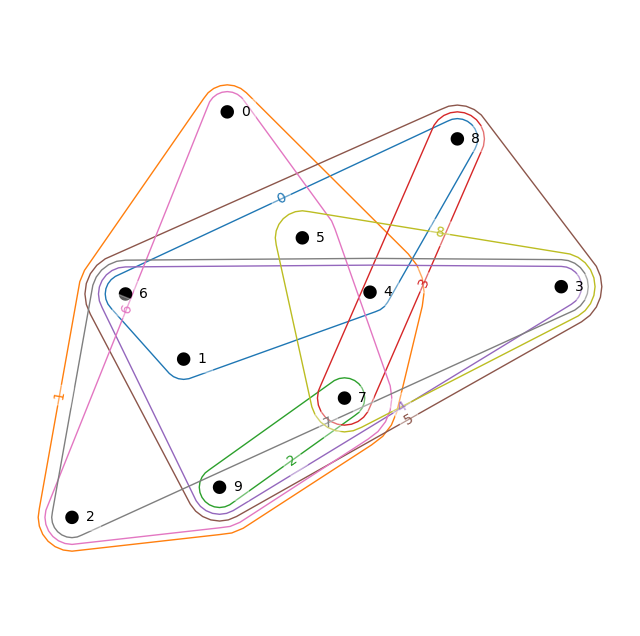

In [11]:
graph_x = hyperrd_to_hypernetx(graph)
hnx.drawing.draw(graph_x)

In [12]:
graph = simple_reduction(graph)

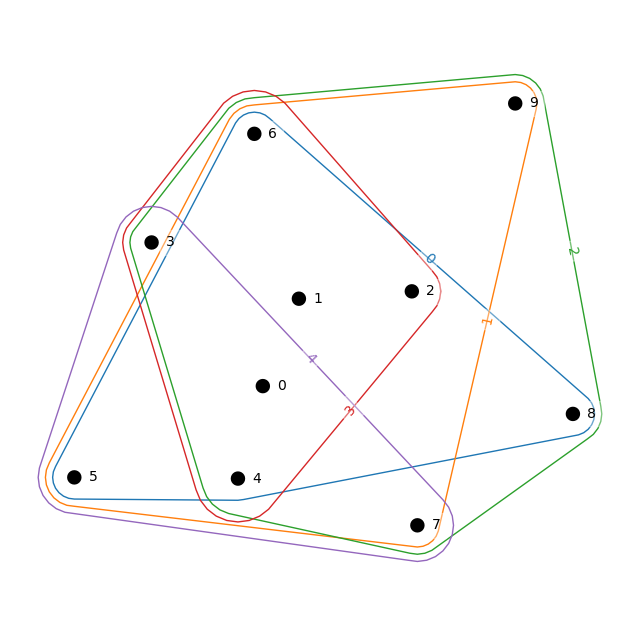

In [13]:
graph_x = hyperrd_to_hypernetx(graph)
hnx.drawing.draw(graph_x)

In [332]:
class Schelling_Model(object):
    # init function to declare class variables
    def __init__(self, n_red, n_blue, n_yellow, graph):
        """Random system initialisation.
        BLUE  =  0
        RED   =  1
        YELLOW = 2
        EMPTY = -1
        """
        array = np.zeros(len(graph.vertices))
        array[n_red: n_red + n_blue] = 1
        array[n_red + n_blue: n_red + n_blue + n_yellow] = 2
        array[n_red + n_blue + n_yellow:] = -1
        self.graph = graph
        self.array = np.array(array)
        np.random.shuffle(self.array)
    
    def running(self, iteration, tol):
        '''Running the model'''
        total = len(self.array)
        for i in range(iteration):
            citizen = np.where(self.array >= 0)[0]
            start = np.random.choice(citizen, 1, replace = False)[0]
            if self.neighbor_coefficient(start) < tol:
                empty = np.where(self.array < 0)[0]
                end = np.random.choice(empty, 1)[0]
                if self.neighbor_coefficient(end) != 2:
                    self.array[start], self.array[end] = self.array[end], self.array[start]
    
    def neighbor_coefficient(self, start):
        '''calculate the neighbor coefficient'''
        edges = self.graph.edges
        coeff = np.array([])
        for edge in edges:
            if start in edge and len(edge) > 1:
                egde_coeff = self.array[list(edge)]
                neighbor = egde_coeff == self.array[start]
                coeff = np.append(coeff, (np.sum(neighbor) - 1) / (len(edge) - 1))
        return np.mean(coeff) if len(coeff) > 0 else 2

In [337]:
model.neighbor_coefficient(7)

2

In [341]:
graph = simple_order(15, 3, 0.02)
graph.edges

{frozenset({2}),
 frozenset({2, 5, 7}),
 frozenset({2, 13}),
 frozenset({4, 6}),
 frozenset({3, 4, 9}),
 frozenset({0, 3}),
 frozenset({1, 8, 12}),
 frozenset({6, 10, 12}),
 frozenset({1, 2, 10}),
 frozenset({2, 5, 8}),
 frozenset({11, 12, 14})}

In [367]:
model = Schelling_Model(3, 3, 3, graph)
model.array

array([ 2.,  0., -1.,  2.,  0., -1.,  2., -1., -1.,  1.,  1., -1., -1.,
        1.,  0.])

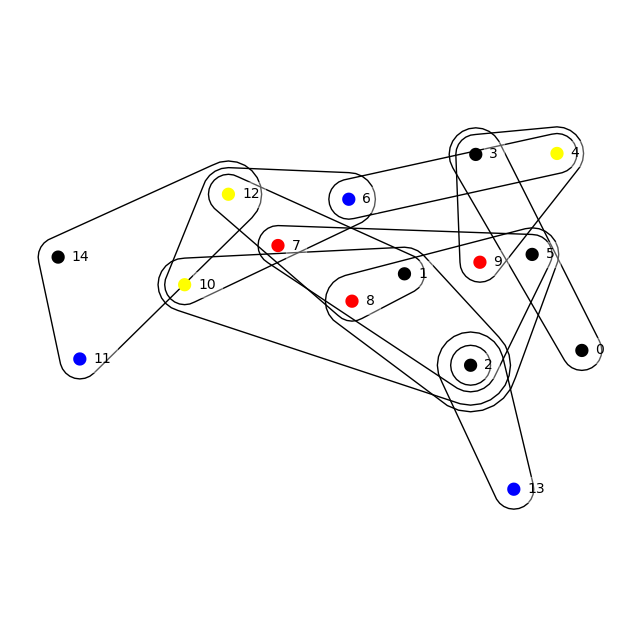

In [361]:
colors = []
for i in model.array:
    if i == 0:
        colors.append('red')
    elif i == 1:
        colors.append('blue')
    elif i == 2:
        colors.append('yellow')
    else:
        colors.append('black')
graph_x = hyperrd_to_hypernetx(model.graph)
hnx.drawing.draw(graph_x, 
                 with_edge_labels = False, 
                 layout_kwargs = {'seed': 39}, edges_kwargs={
     'edgecolors': 'black'
    },
                 nodes_kwargs={
     'facecolors': colors
    })

In [362]:
model.running(100, 0.2)

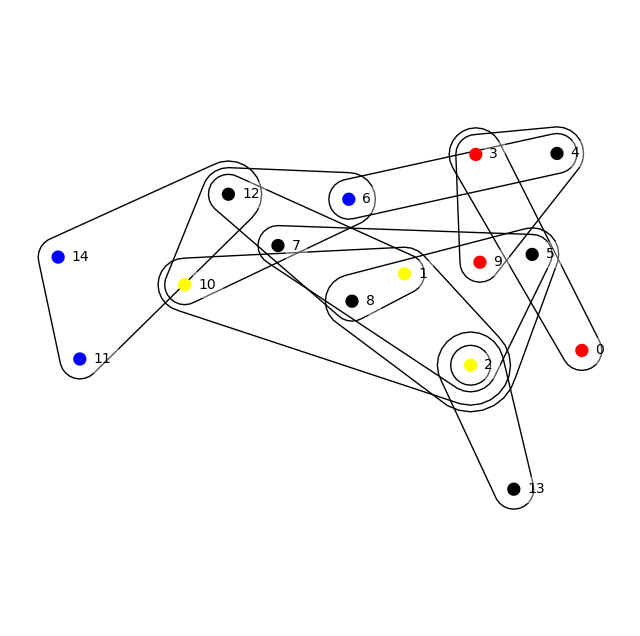

In [363]:
colors = []
for i in model.array:
    if i == 0:
        colors.append('red')
    elif i == 1:
        colors.append('blue')
    elif i == 2:
        colors.append('yellow')
    else:
        colors.append('black')
graph_x = hyperrd_to_hypernetx(model.graph)
hnx.drawing.draw(graph_x, 
                 with_edge_labels = False, 
                 layout_kwargs = {'seed': 39}, edges_kwargs={
     'edgecolors': 'black'
    },
                 nodes_kwargs={
     'facecolors': colors
    })

In [373]:
graph = k_uniform(15, 3, 0.02)
model = Schelling_Model(3, 3, 3, graph)
model.array

array([ 2., -1.,  1.,  0.,  1., -1.,  1., -1.,  2.,  0., -1.,  2., -1.,
        0., -1.])

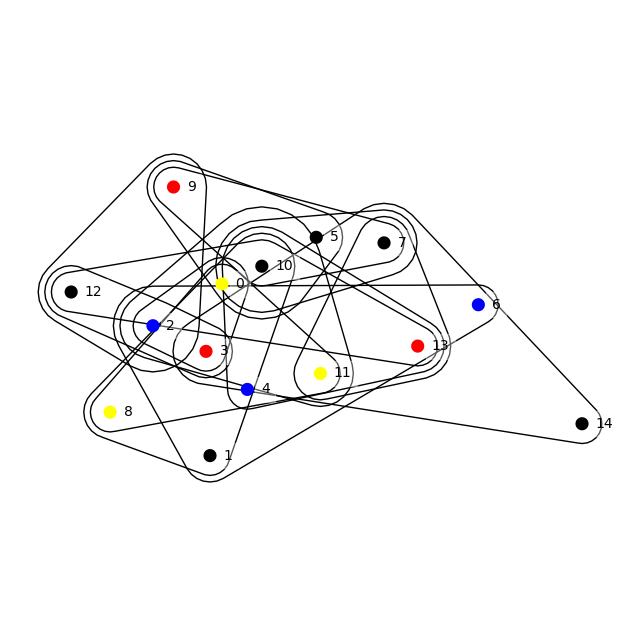

In [374]:
colors = []
for i in model.array:
    if i == 0:
        colors.append('red')
    elif i == 1:
        colors.append('blue')
    elif i == 2:
        colors.append('yellow')
    else:
        colors.append('black')
graph_x = hyperrd_to_hypernetx(model.graph)
hnx.drawing.draw(graph_x, 
                 with_edge_labels = False, 
                 layout_kwargs = {'seed': 39}, edges_kwargs={
     'edgecolors': 'black'
    },
                 nodes_kwargs={
     'facecolors': colors
    })

In [380]:
model.running(100, 0.4)

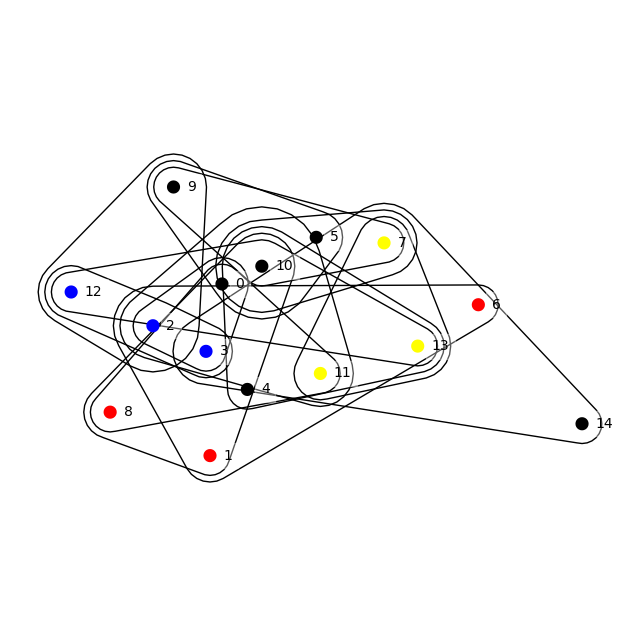

In [381]:
colors = []
for i in model.array:
    if i == 0:
        colors.append('red')
    elif i == 1:
        colors.append('blue')
    elif i == 2:
        colors.append('yellow')
    else:
        colors.append('black')
graph_x = hyperrd_to_hypernetx(model.graph)
hnx.drawing.draw(graph_x, 
                 with_edge_labels = False, 
                 layout_kwargs = {'seed': 39}, edges_kwargs={
     'edgecolors': 'black'
    },
                 nodes_kwargs={
     'facecolors': colors
    })